<a href="https://colab.research.google.com/github/VaishaliChauhanCCTB/demo2/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Data**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
#import pandas as pd
url = 'https://raw.githubusercontent.com/VaishaliChauhanCCTB/demo2/refs/heads/main/exercise_data.csv'
# data = pd.read_csv('/content/sample_data/Custom_Data/exercise_data.csv')
data = pd.read_csv(url)
data.head(10)

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0
5,60,06-12-2020,102,127,300.0
6,60,07-12-2020,110,136,374.0
7,450,08-12-2020,104,134,253.3
8,30,09-12-2020,109,133,195.1
9,60,10-12-2020,98,124,269.0


In [3]:
#To read the last 5 rows
data.tail()

,Duration,Date,Pulse,Maxpulse,Calories
27,60,27-12-2020,92,118,241.0
28,60,28-12-2020,103,132,NaN
29,60,29-12-2020,100,132,280.0
30,60,30-12-2020,102,129,380.3
31,60,31-12-2020,92,115,243.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [5]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


Missing Values Analysis

In [6]:
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


In [8]:
#to get the percentage of null values in each column
(data.isnull().sum()/(len(data)))*100

,0
Duration,0.000
Date,3.125
Pulse,0.000
Maxpulse,0.000
Calories,6.250


In [9]:
data.shape

(32, 5)

**Data Reduction**

In [10]:
#Removing the Pulse Column
#data = data.drop(['Pulse'], axis=1)


In [11]:
data.head()

,Duration,Date,Maxpulse,Calories
0,60,01-12-2020,130,409.1
1,60,02-12-2020,145,479.0
2,60,03-12-2020,135,340.0
3,45,04-12-2020,175,282.4
4,45,05-12-2020,148,406.0


In [12]:
data.shape

(32, 4)

**Working with Date & Time**

In [13]:
from datetime import date
print(date.today().year)
print(date.today().month)
print(date.today())
# Is it 23 Jan today? - Giving us date time in UTC

2025
1
2025-01-30


In [14]:
from datetime import datetime
current_time = datetime.now()
print(current_time)

print("Current Time:", current_time.strftime("%H:%M:%S"))

2025-01-30 01:32:17.608533
Current Time: 01:32:17


In [33]:
#Calculate the difference between Pulse & MaxPulse and store it in a new column "DifferenceOfPulse"
data['DifferenceOfPulse'] = data['Maxpulse']-data['Pulse']
data.head()

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31


**[Handling missing values]**
Different ways of handling missing values:


1.   Mean
2.   Mode
3.  Median
4. Drop those rows



In [17]:
data.head(20)

,Duration,Date,Maxpulse,Calories
0,60,01-12-2020,130,409.1
1,60,02-12-2020,145,479.0
2,60,03-12-2020,135,340.0
3,45,04-12-2020,175,282.4
4,45,05-12-2020,148,406.0
5,60,06-12-2020,127,300.0
6,60,07-12-2020,136,374.0
7,450,08-12-2020,134,253.3
8,30,09-12-2020,133,195.1
9,60,10-12-2020,124,269.0


In [18]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())
print("Mean of Maxpulse is:", data['Maxpulse'].mean())
print("Median of Maxpulse is:", data['Maxpulse'].median())
print("Mode of Maxpulse is:", data['Maxpulse'].mode()[0])
# 10, 20, 20, 5, 5

#Mean, Median, Mode of Calories:
# data['Calories'].mean()
# average(A10:A50)

Mean of Maxpulse is: 128.5
Median of Maxpulse is: 127.5
Mode of Maxpulse is: 120


In [19]:
data.head(20)

,Duration,Date,Maxpulse,Calories
0,60,01-12-2020,130,409.10
1,60,02-12-2020,145,479.00
2,60,03-12-2020,135,340.00
3,45,04-12-2020,175,282.40
4,45,05-12-2020,148,406.00
5,60,06-12-2020,127,300.00
6,60,07-12-2020,136,374.00
7,450,08-12-2020,134,253.30
8,30,09-12-2020,133,195.10
9,60,10-12-2020,124,269.00


In [20]:
data.shape

(32, 4)

In [21]:
data.isnull().sum()

,0
Duration,0
Date,1
Maxpulse,0
Calories,0


In [22]:
data_cleaned =data.dropna()
#all the rows of all the columns those contain null values


In [23]:
data_cleaned.isnull().sum()

,0
Duration,0
Date,0
Maxpulse,0
Calories,0


In [24]:
data_cleaned.shape

(31, 4)

In [25]:
data = data.dropna(subset=['Calories'])
#delete null rows from calories columns only
print(data.isnull().sum())
print(data.shape)

Duration    0
Date        1
Maxpulse    0
Calories    0
dtype: int64
(32, 4)


In [26]:
import pandas as pd
import numpy as np

#Creating Data frame
tempData = pd.DataFrame({
    'Age': [25, 30, np.nan, 35, 40],
    'Salary': [50000, 60000, 55000, np.nan, 65000],
    'City': ['New York', 'San Francisco', np.nan, 'Chicago', 'New York']
})

#Question: Fill the missing values, for age -> use mean, for Salary: use median, For city use mode:
print(tempData)

    Age   Salary           City
0  25.0  50000.0       New York
1  30.0  60000.0  San Francisco
2   NaN  55000.0            NaN
3  35.0      NaN        Chicago
4  40.0  65000.0       New York


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

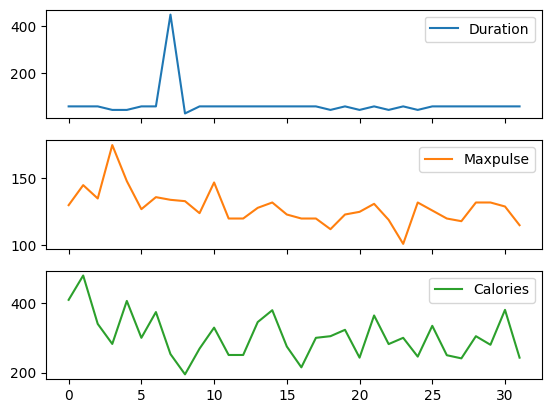

In [27]:
data.plot(kind='line', subplots=True)

<Axes: >

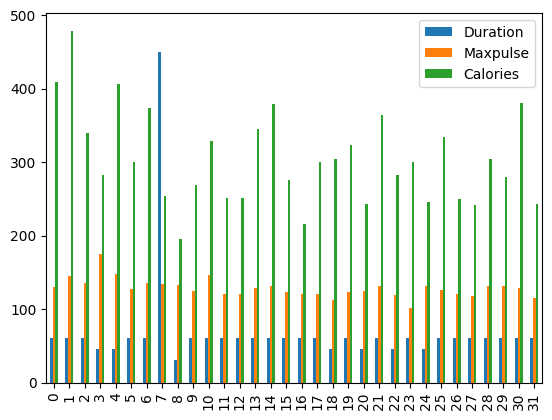

In [28]:
data.plot(kind='bar')

<Axes: >

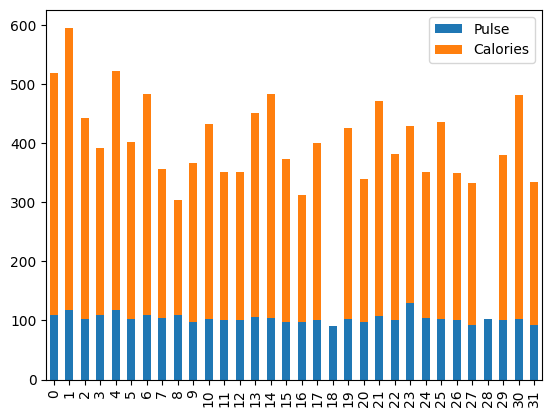

In [31]:
barData = data[["Pulse", "Calories"]]
barData.plot(kind='bar', stacked=True)

**Scatter**

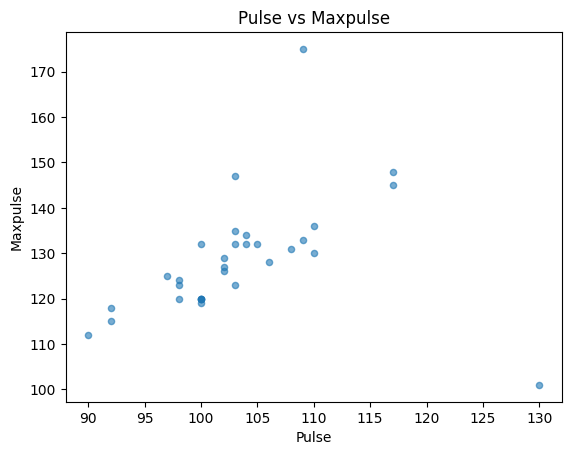

In [36]:
data.plot(kind='scatter', x='Pulse', y='Maxpulse', alpha=0.6)
plt.title('Pulse vs Maxpulse')
plt.show()

In [37]:
#Correlation Matrix
# x,y -> increase x -> value of y is also increasing -> positive relation
# x,y -> increase x -> decrease in the value of y -> negative relation
# 0-1
#Heatmap?
data.head()

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31


In [39]:
numerical_data = data.drop(columns=['Date'])
numerical_data.head()

# Generate the correlation matrix
correlation_matrix = numerical_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Duration     Pulse  Maxpulse  Calories  DifferenceOfPulse
Duration           1.000000  0.004410  0.049959 -0.114169           0.046612
Pulse              0.004410  1.000000  0.276583  0.513186          -0.321259
Maxpulse           0.049959  0.276583  1.000000  0.357460           0.821194
Calories          -0.114169  0.513186  0.357460  1.000000           0.053285
DifferenceOfPulse  0.046612 -0.321259  0.821194  0.053285           1.000000


**HeatMap to show the correlation**

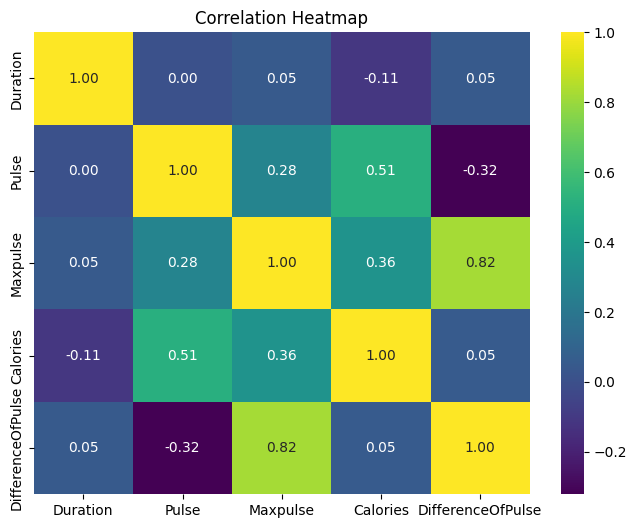

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

**Which attributes are strongly positively related to each other?**
-- Maxpulse & differeneOfPulse
-- Pulse & Calories